In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from tqdm import tqdm
import sys

In [2]:
# Add Project Root to Path
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, "..", ".."))
sys.path.append(project_root)

# Import custom utilities
from src.utils.dataset_utils import download_dataset
from src.utils.directory_utils import display_directory_tree

In [3]:
# Download Dataset
dataset_root = os.path.join(project_root, "data", "LCC-FASD_dataset")
dataset_slug = "faber24/lcc-fasd"

if not download_dataset(dataset_slug, dataset_root):
    raise Exception("Failed to download dataset")

Dataset already exists locally


In [4]:
# Display Dataset Structure
print("Dataset structure:")
display_directory_tree(dataset_root, max_depth=4)

Dataset structure:
LCC-FASD_dataset/
    LCC_FASD/
        LCC_FASD_development/
            real/
                AGL752VM_id147_s0_105.png/
                AGL752VM_id147_s0_120.png/
                AGL752VM_id147_s0_135.png/
                AGL752VM_id147_s0_15.png/
                AGL752VM_id147_s0_150.png/
                AGL752VM_id147_s0_30.png/
                AGL752VM_id147_s0_45.png/
                AGL752VM_id147_s0_60.png/
                AGL752VM_id147_s0_75.png/
                AGL752VM_id147_s0_90.png/
                ... (395 more)
            spoof/
                FT720P_G780_REDMI4X_id0_s0_105.png/
                FT720P_G780_REDMI4X_id0_s0_120.png/
                FT720P_G780_REDMI4X_id0_s0_135.png/
                FT720P_G780_REDMI4X_id0_s0_15.png/
                FT720P_G780_REDMI4X_id0_s0_150.png/
                FT720P_G780_REDMI4X_id0_s0_30.png/
                FT720P_G780_REDMI4X_id0_s0_45.png/
                FT720P_G780_REDMI4X_id0_s0_60.png/
               

In [5]:
# Setup Paths
development_real_path = os.path.join(
    dataset_root, "LCC_FASD", "LCC_FASD_development", "real"
)
development_spoof_path = os.path.join(
    dataset_root, "LCC_FASD", "LCC_FASD_development", "spoof"
)
evaluation_real_path = os.path.join(
    dataset_root, "LCC_FASD", "LCC_FASD_evaluation", "real"
)
evaluation_spoof_path = os.path.join(
    dataset_root, "LCC_FASD", "LCC_FASD_evaluation", "spoof"
)
training_real_path = os.path.join(dataset_root, "LCC_FASD", "LCC_FASD_training", "real")
training_spoof_path = os.path.join(
    dataset_root, "LCC_FASD", "LCC_FASD_training", "spoof"
)

In [6]:
# Count Images
def count_images(directory):
    """Count the number of images in a directory."""
    return len(
        [f for f in os.listdir(directory) if f.endswith((".png", ".jpg", ".jpeg"))]
    )


# Count images in each folder
development_real_count = count_images(development_real_path)
development_spoof_count = count_images(development_spoof_path)
evaluation_real_count = count_images(evaluation_real_path)
evaluation_spoof_count = count_images(evaluation_spoof_path)
training_real_count = count_images(training_real_path)
training_spoof_count = count_images(training_spoof_path)

# Print the counts
print(f"Development - Real: {development_real_count} images")
print(f"Development - Spoof: {development_spoof_count} images")
print(f"Evaluation - Real: {evaluation_real_count} images")
print(f"Evaluation - Spoof: {evaluation_spoof_count} images")
print(f"Training - Real: {training_real_count} images")
print(f"Training - Spoof: {training_spoof_count} images")

Development - Real: 405 images
Development - Spoof: 2543 images
Evaluation - Real: 314 images
Evaluation - Spoof: 7266 images
Training - Real: 1223 images
Training - Spoof: 7076 images


C:\Users\quang\AppData\Local\Temp\ipykernel_4280\3645542463.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


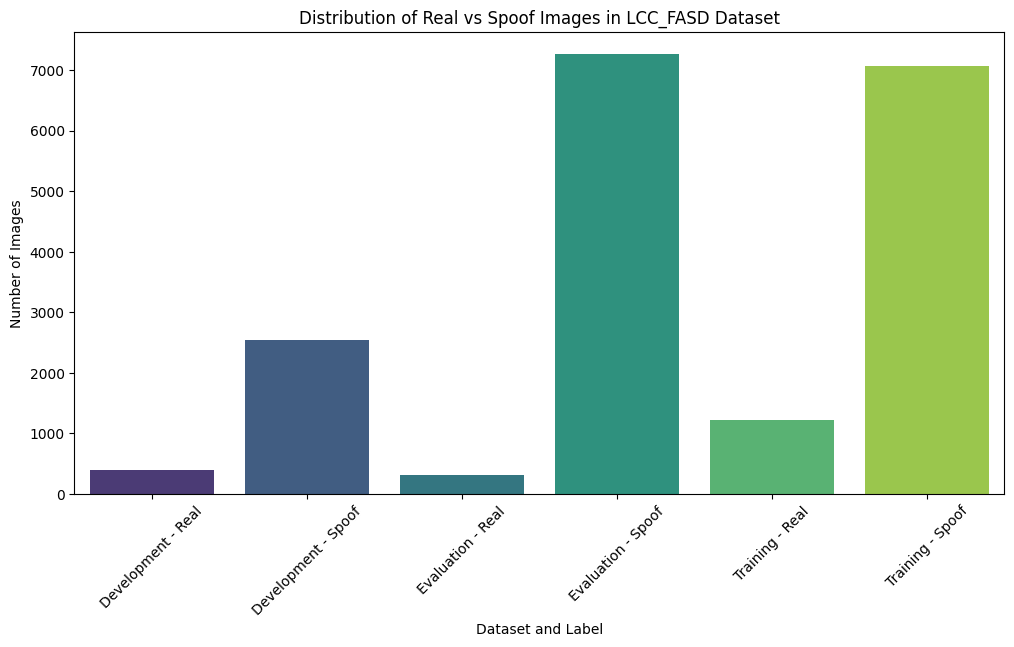

In [7]:
# Plot Image Distribution
image_counts = {
    "Development - Real": development_real_count,
    "Development - Spoof": development_spoof_count,
    "Evaluation - Real": evaluation_real_count,
    "Evaluation - Spoof": evaluation_spoof_count,
    "Training - Real": training_real_count,
    "Training - Spoof": training_spoof_count,
}

# Create a bar plot for the image distribution
plt.figure(figsize=(12, 6))
sns.barplot(
    x=list(image_counts.keys()), y=list(image_counts.values()), palette="viridis"
)
plt.title("Distribution of Real vs Spoof Images in LCC_FASD Dataset")
plt.xlabel("Dataset and Label")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

Analyzing spoof: 100%|██████████| 7076/7076 [00:56<00:00, 124.30it/s]
C:\Users\quang\AppData\Local\Temp\ipykernel_4280\2607450916.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="height", data=all_stats, palette="viridis")


Summary Statistics:
                         height                   width              \
                           mean         std        mean         std   
label                                                                 
Development - Real   543.155556  193.441495  543.264198  193.438357   
Development - Spoof  526.387731  204.932201  526.387731  204.932201   
Evaluation - Real    565.570064  158.152502  565.570064  158.152502   
Evaluation - Spoof   499.943848  209.012780  499.943848  209.012780   
Training - Real      548.774325  191.875198  548.774325  191.875198   
Training - Spoof     521.407999  202.533827  521.407999  202.533827   

                    mean_intensity            std_intensity             
                              mean        std          mean        std  
label                                                                   
Development - Real      104.892465  24.042481     53.011314  13.051648  
Development - Spoof     121.660616  32.602381   

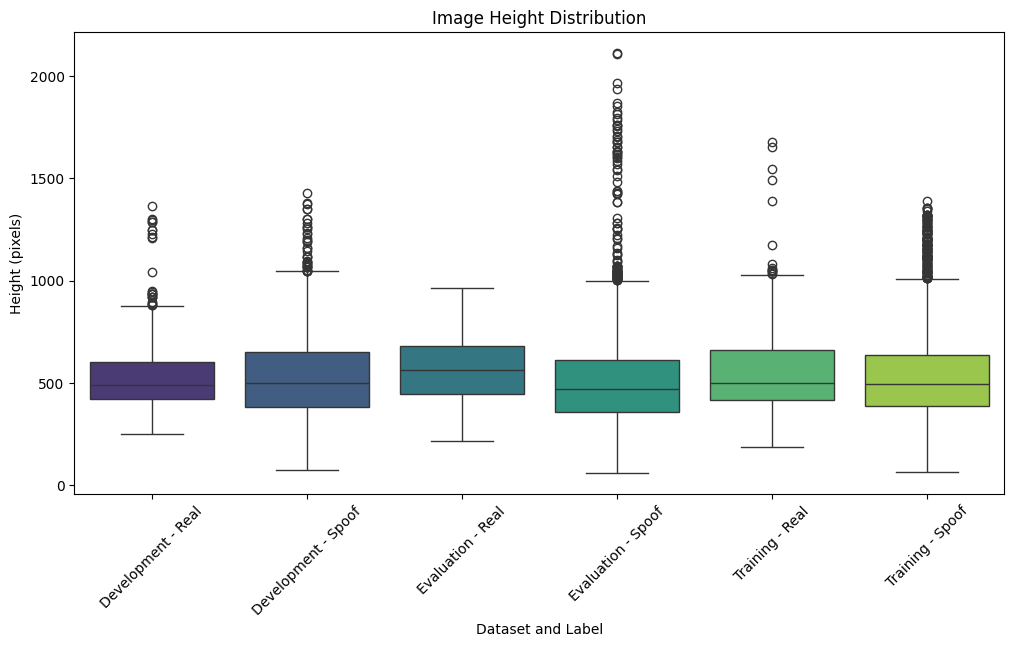

C:\Users\quang\AppData\Local\Temp\ipykernel_4280\2607450916.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="width", data=all_stats, palette="viridis")


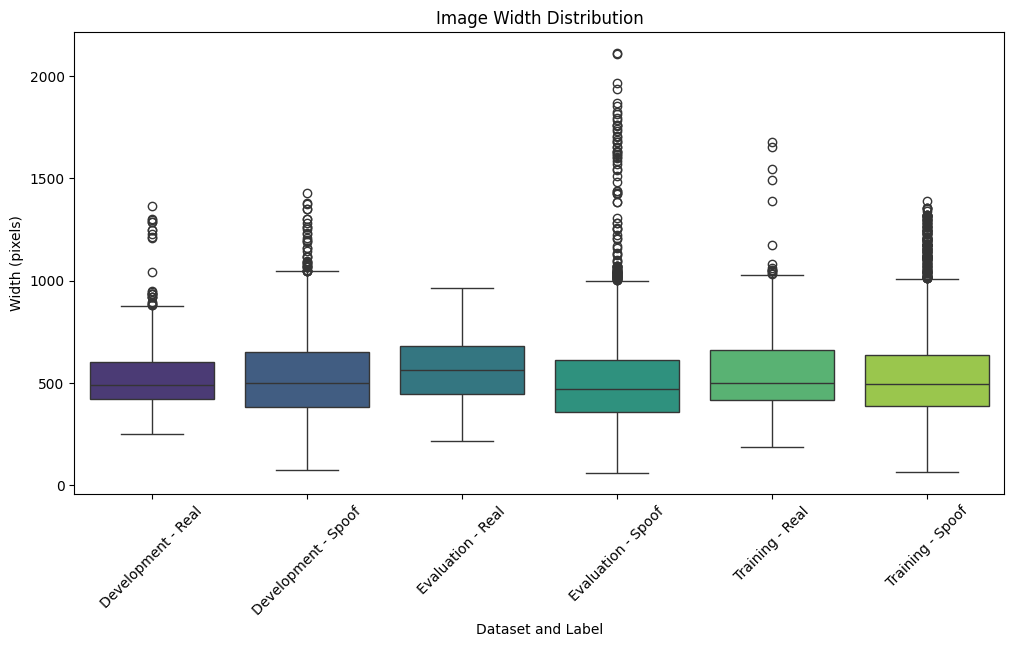

C:\Users\quang\AppData\Local\Temp\ipykernel_4280\2607450916.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="mean_intensity", data=all_stats, palette="viridis")


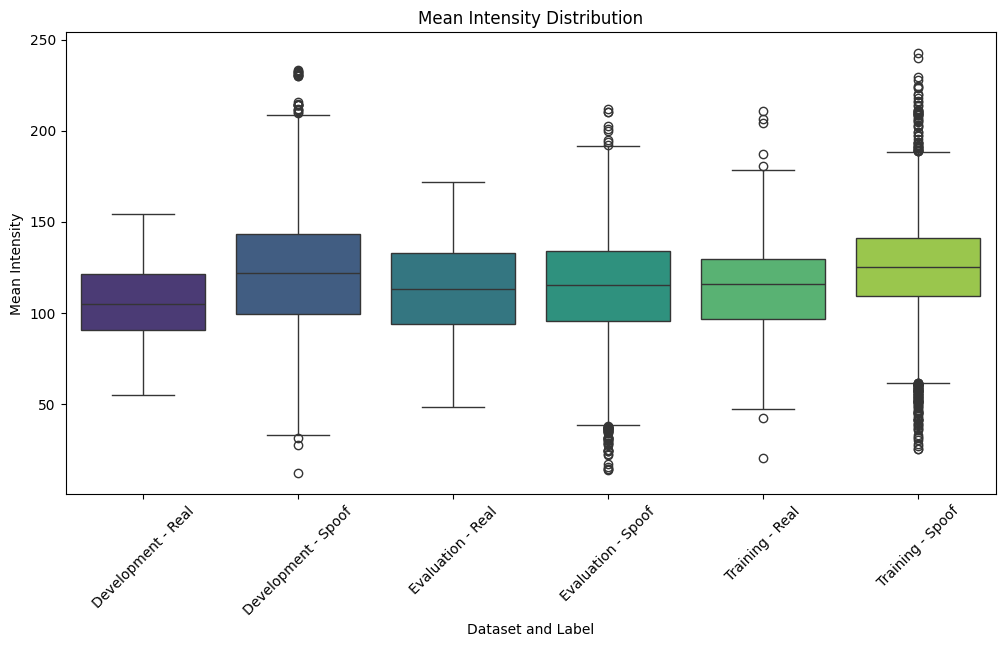

C:\Users\quang\AppData\Local\Temp\ipykernel_4280\2607450916.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="std_intensity", data=all_stats, palette="viridis")


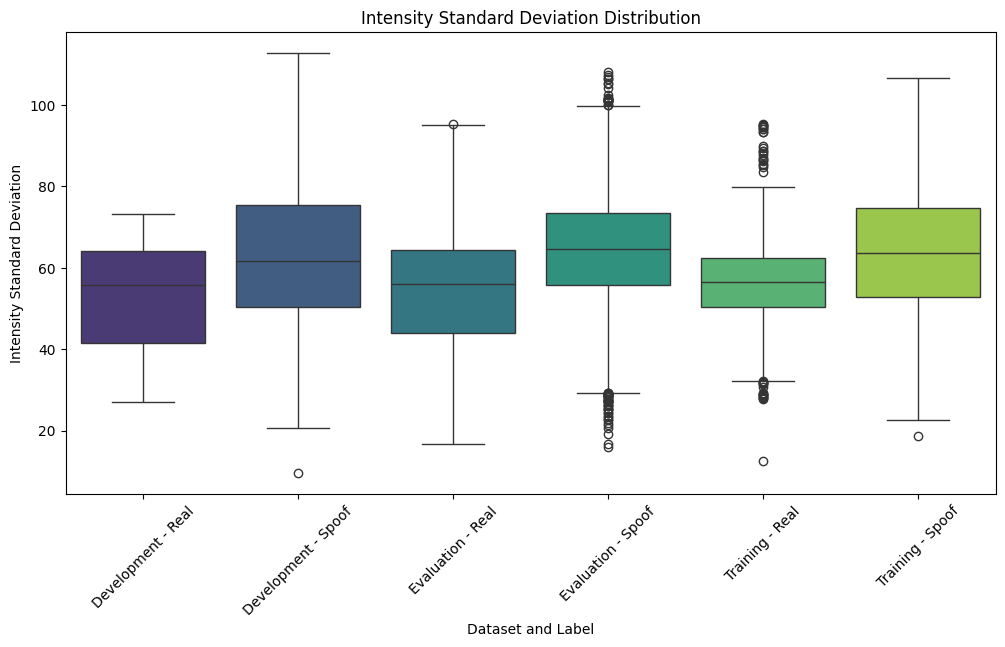

In [8]:
# Analyze Image Statistics
def analyze_image_stats(image_path):
    """Analyze basic statistics of an image."""
    img = cv2.imread(image_path)
    if img is not None:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return {
            "height": img.shape[0],
            "width": img.shape[1],
            "mean_intensity": np.mean(img_gray),
            "std_intensity": np.std(img_gray),
        }
    return None


def analyze_directory(directory):
    """Analyze all images in a directory."""
    image_files = [
        os.path.join(directory, f)
        for f in os.listdir(directory)
        if f.endswith((".png", ".jpg", ".jpeg"))
    ]
    stats = []

    for image_file in tqdm(
        image_files, desc=f"Analyzing {os.path.basename(directory)}"
    ):
        image_stats = analyze_image_stats(image_file)
        if image_stats:
            stats.append(image_stats)

    return pd.DataFrame(stats)


# Analyze images in each folder
development_real_stats = analyze_directory(development_real_path)
development_spoof_stats = analyze_directory(development_spoof_path)
evaluation_real_stats = analyze_directory(evaluation_real_path)
evaluation_spoof_stats = analyze_directory(evaluation_spoof_path)
training_real_stats = analyze_directory(training_real_path)
training_spoof_stats = analyze_directory(training_spoof_path)

# Combine all stats into a single DataFrame
development_real_stats["label"] = "Development - Real"
development_spoof_stats["label"] = "Development - Spoof"
evaluation_real_stats["label"] = "Evaluation - Real"
evaluation_spoof_stats["label"] = "Evaluation - Spoof"
training_real_stats["label"] = "Training - Real"
training_spoof_stats["label"] = "Training - Spoof"

all_stats = pd.concat(
    [
        development_real_stats,
        development_spoof_stats,
        evaluation_real_stats,
        evaluation_spoof_stats,
        training_real_stats,
        training_spoof_stats,
    ]
)

# Display summary statistics
print("Summary Statistics:")
print(
    all_stats.groupby("label").agg(
        {
            "height": ["mean", "std"],
            "width": ["mean", "std"],
            "mean_intensity": ["mean", "std"],
            "std_intensity": ["mean", "std"],
        }
    )
)

# Plot image dimensions
plt.figure(figsize=(12, 6))
sns.boxplot(x="label", y="height", data=all_stats, palette="viridis")
plt.title("Image Height Distribution")
plt.xlabel("Dataset and Label")
plt.ylabel("Height (pixels)")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="label", y="width", data=all_stats, palette="viridis")
plt.title("Image Width Distribution")
plt.xlabel("Dataset and Label")
plt.ylabel("Width (pixels)")
plt.xticks(rotation=45)
plt.show()

# Plot intensity statistics
plt.figure(figsize=(12, 6))
sns.boxplot(x="label", y="mean_intensity", data=all_stats, palette="viridis")
plt.title("Mean Intensity Distribution")
plt.xlabel("Dataset and Label")
plt.ylabel("Mean Intensity")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="label", y="std_intensity", data=all_stats, palette="viridis")
plt.title("Intensity Standard Deviation Distribution")
plt.xlabel("Dataset and Label")
plt.ylabel("Intensity Standard Deviation")
plt.xticks(rotation=45)
plt.show()

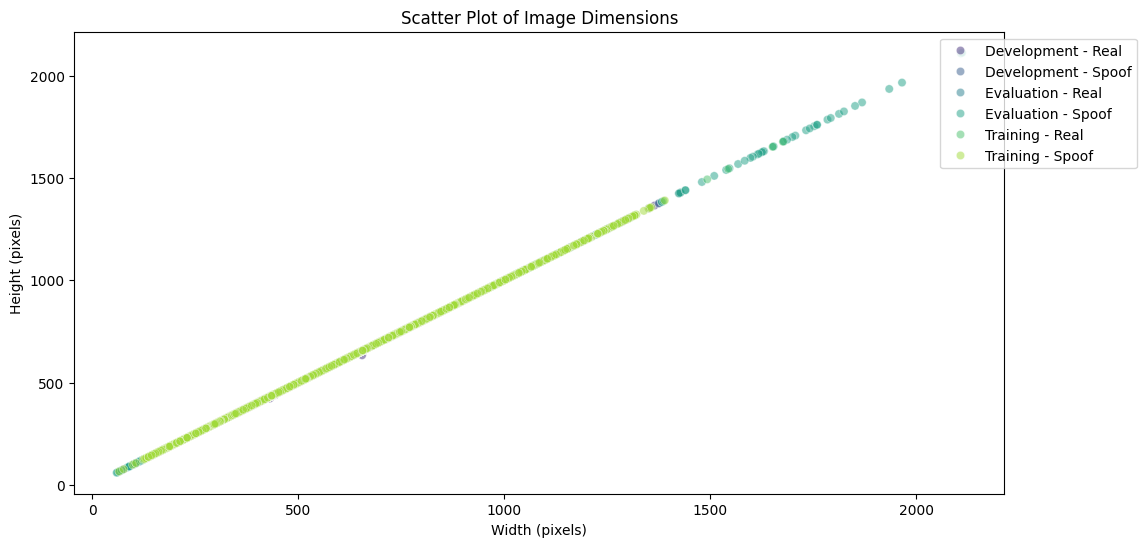

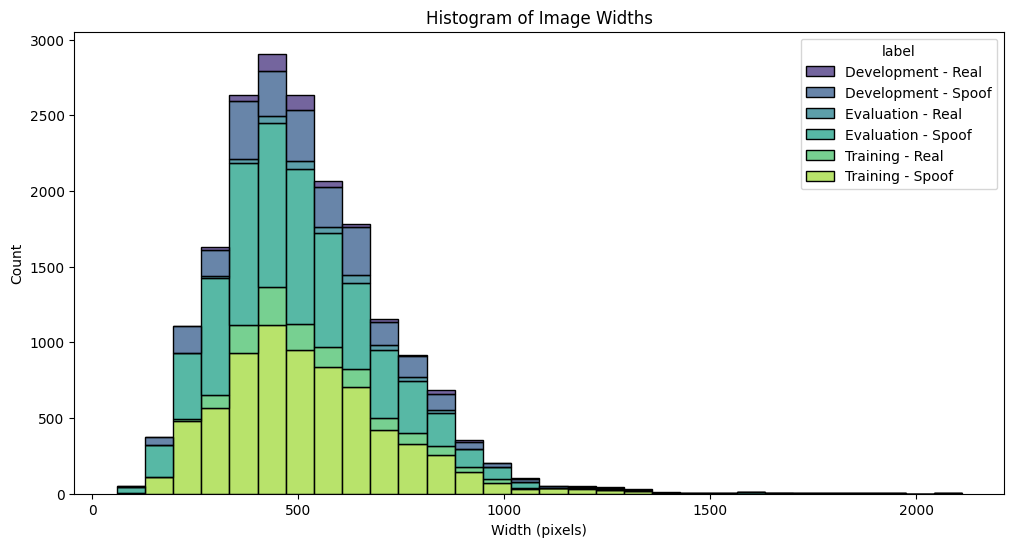

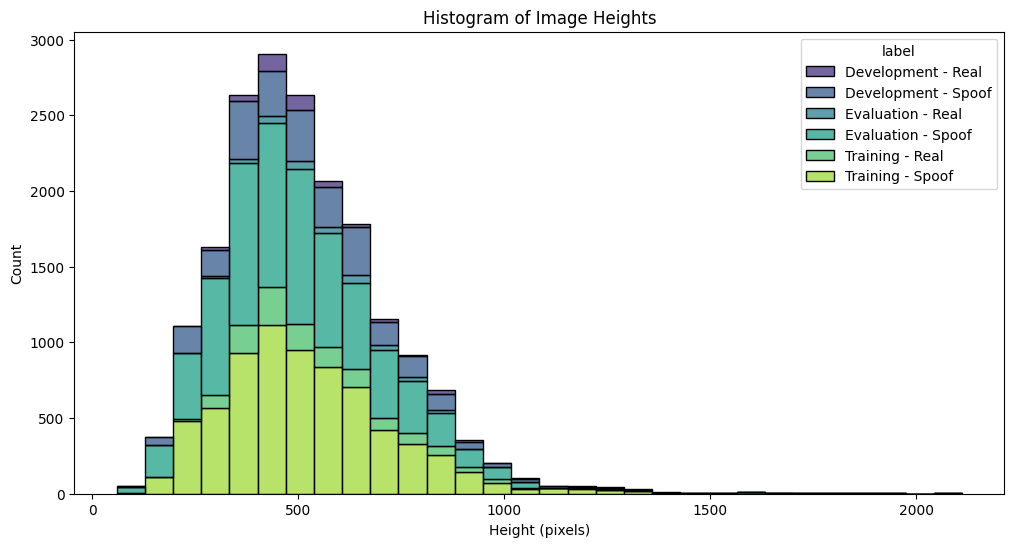

In [9]:
# Plot Image Dimensions

# Scatter plot for image dimensions
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x="width", y="height", hue="label", data=all_stats, palette="viridis", alpha=0.5
)
plt.title("Scatter Plot of Image Dimensions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.legend(loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

# Histogram for image widths
plt.figure(figsize=(12, 6))
sns.histplot(
    data=all_stats, x="width", hue="label", multiple="stack", palette="viridis", bins=30
)
plt.title("Histogram of Image Widths")
plt.xlabel("Width (pixels)")
plt.ylabel("Count")
plt.show()

# Histogram for image heights
plt.figure(figsize=(12, 6))
sns.histplot(
    data=all_stats,
    x="height",
    hue="label",
    multiple="stack",
    palette="viridis",
    bins=30,
)
plt.title("Histogram of Image Heights")
plt.xlabel("Height (pixels)")
plt.ylabel("Count")
plt.show()

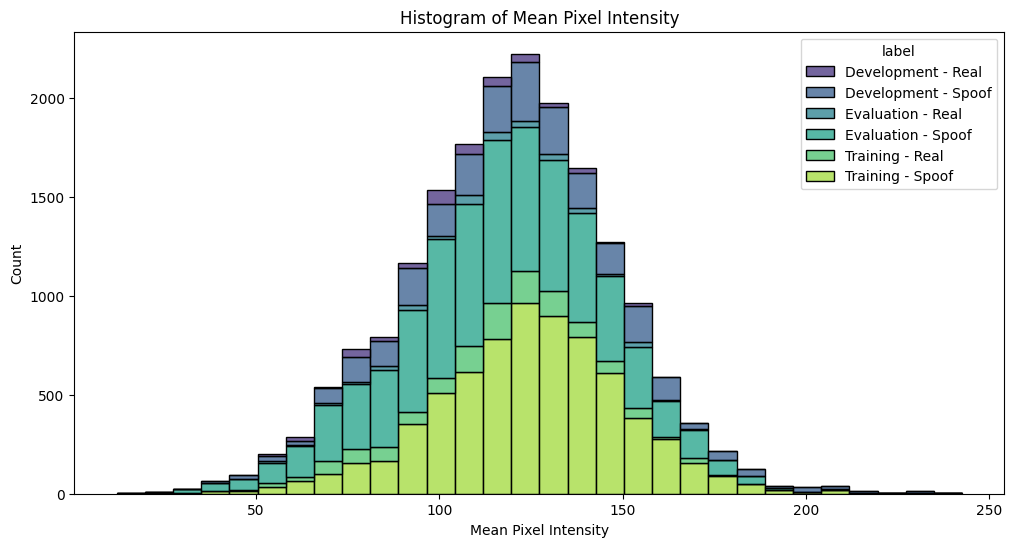

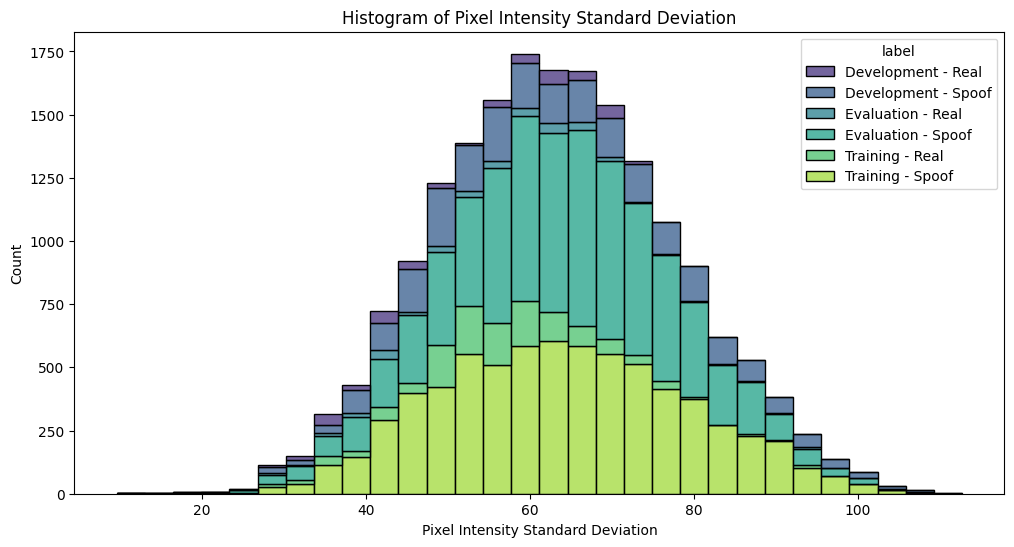

In [10]:
# Plot Intensity Distribution

# Plot the distribution of mean pixel intensity
plt.figure(figsize=(12, 6))
sns.histplot(
    data=all_stats,
    x="mean_intensity",
    hue="label",
    multiple="stack",
    palette="viridis",
    bins=30,
)
plt.title("Histogram of Mean Pixel Intensity")
plt.xlabel("Mean Pixel Intensity")
plt.ylabel("Count")
plt.show()

# Plot the distribution of standard deviation of pixel intensity
plt.figure(figsize=(12, 6))
sns.histplot(
    data=all_stats,
    x="std_intensity",
    hue="label",
    multiple="stack",
    palette="viridis",
    bins=30,
)
plt.title("Histogram of Pixel Intensity Standard Deviation")
plt.xlabel("Pixel Intensity Standard Deviation")
plt.ylabel("Count")
plt.show()

Analyzing quality in spoof: 100%|██████████| 7076/7076 [01:05<00:00, 108.46it/s]
C:\Users\quang\AppData\Local\Temp\ipykernel_4280\528241015.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="sharpness", data=all_quality, palette="viridis")


Image Quality Statistics:
                     sharpness              contrast             brightness  \
                          mean        std       mean        std        mean   
label                                                                         
Development - Real   24.024330   8.850554  53.011314  13.051648  104.892465   
Development - Spoof  23.390230   9.949561  63.344875  16.710175  121.660616   
Evaluation - Real    24.384830  11.951517  55.692991  14.703881  113.073834   
Evaluation - Spoof   26.903505  13.819712  64.270266  13.449501  114.052120   
Training - Real      26.827969   9.778912  56.532520  10.925974  113.563786   
Training - Spoof     26.359430  12.455545  64.165604  15.009598  124.754479   

                                
                           std  
label                           
Development - Real   24.042481  
Development - Spoof  32.602381  
Evaluation - Real    27.443323  
Evaluation - Spoof   29.166536  
Training - Real      26.777164 

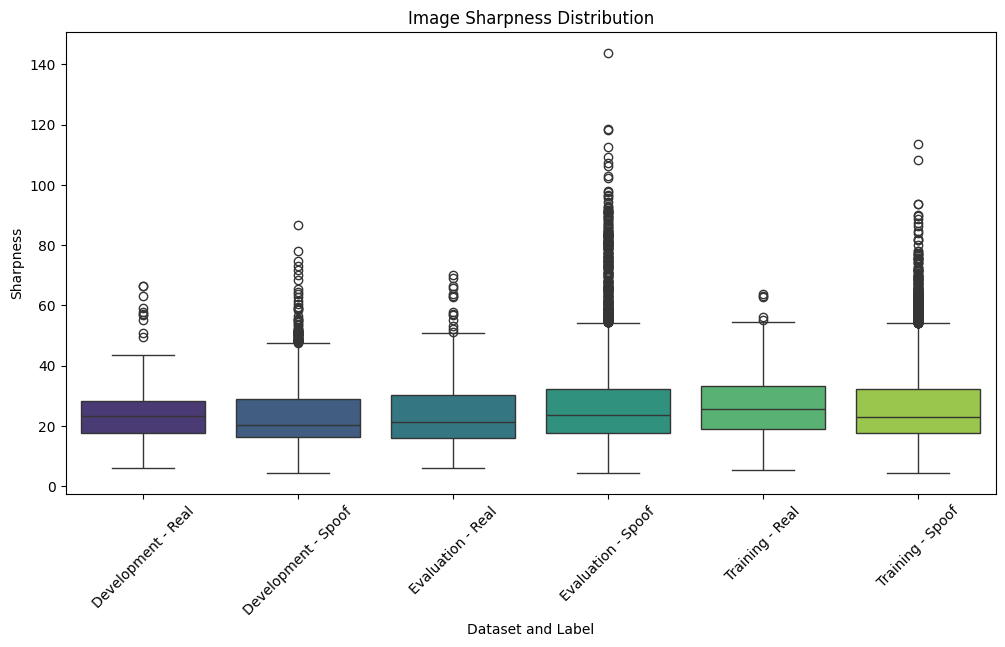

C:\Users\quang\AppData\Local\Temp\ipykernel_4280\528241015.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="contrast", data=all_quality, palette="viridis")


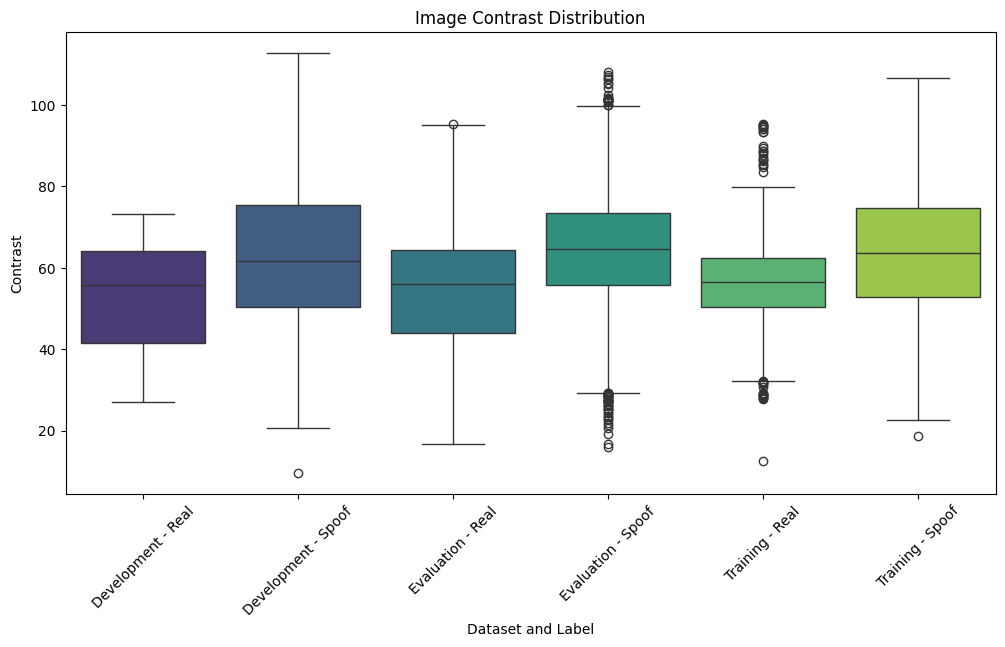

C:\Users\quang\AppData\Local\Temp\ipykernel_4280\528241015.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="brightness", data=all_quality, palette="viridis")


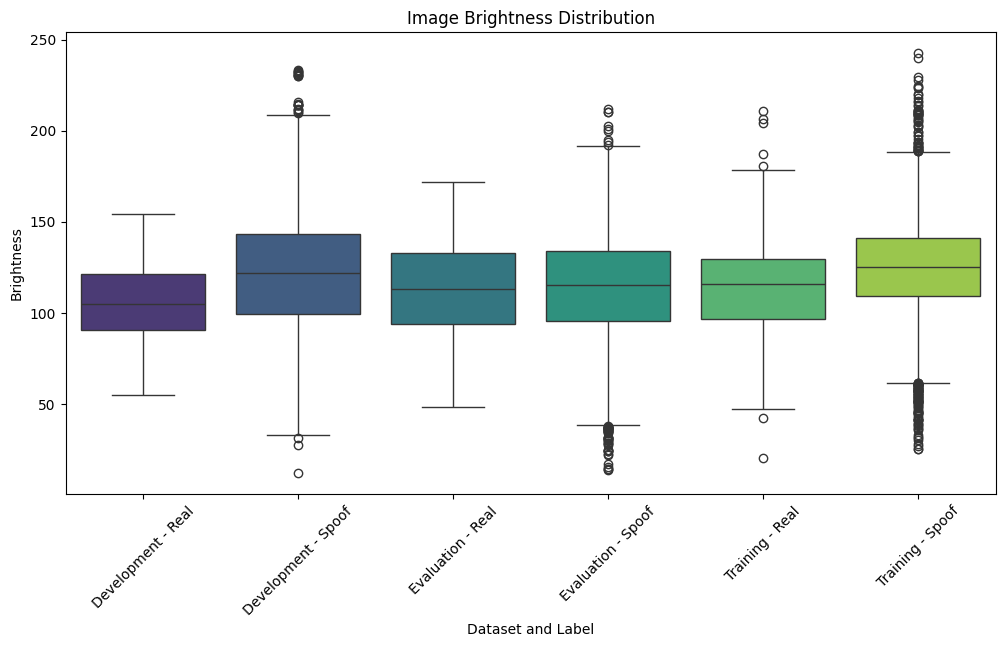

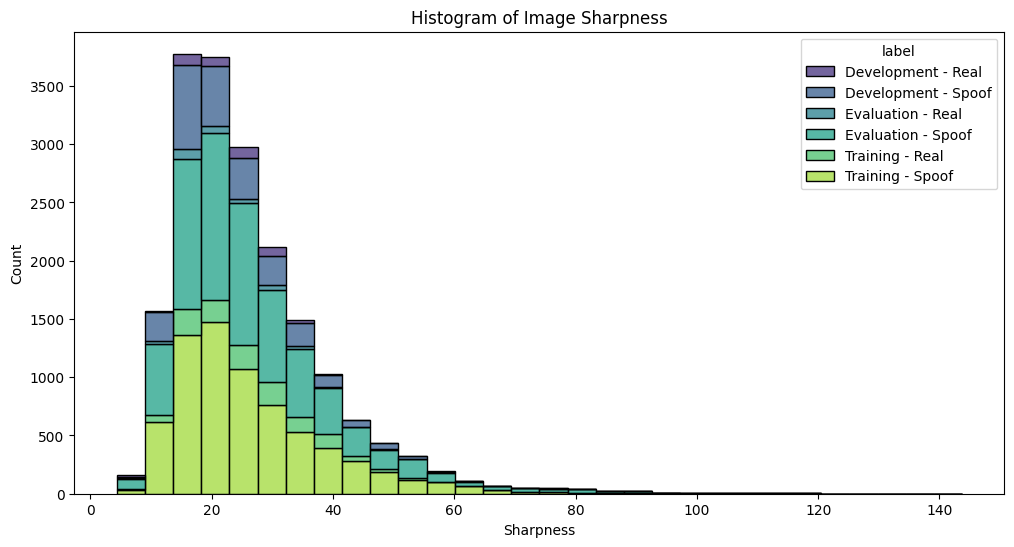

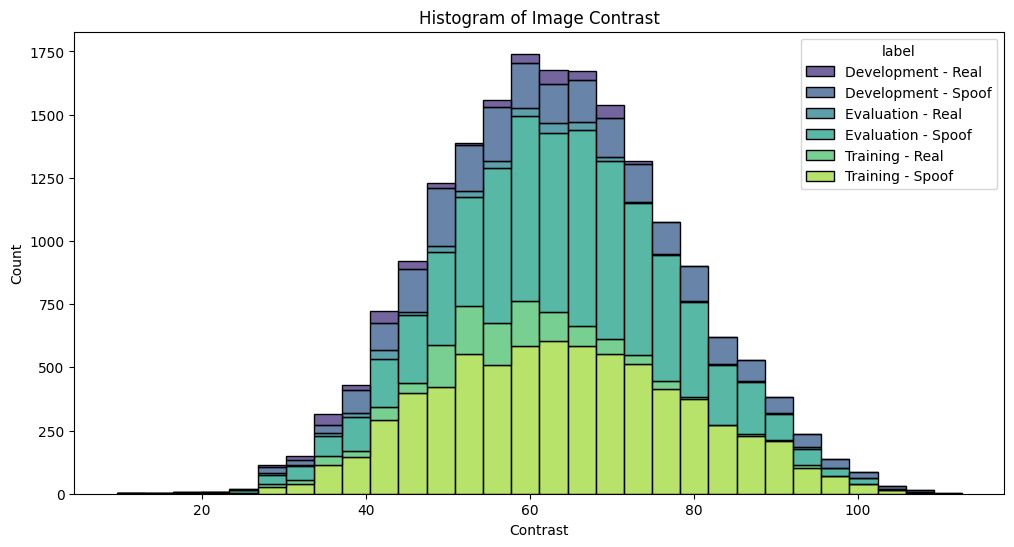

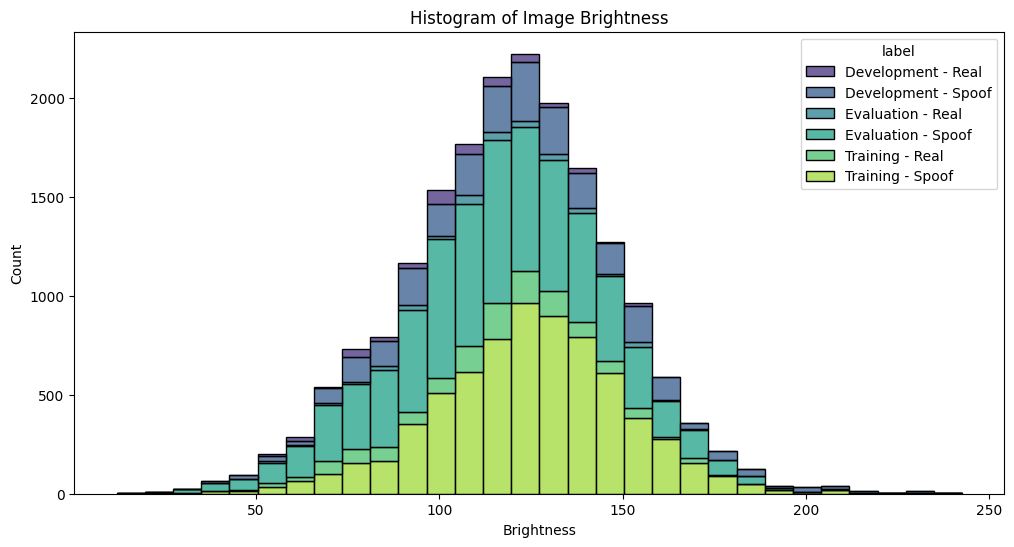

In [11]:
# Analyze Image Quality
def compute_image_quality(image_path):
    """Compute image quality metrics such as sharpness, contrast, and brightness."""
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Compute gradients
        gx = cv2.Sobel(gray, cv2.CV_32F, 1, 0)
        gy = cv2.Sobel(gray, cv2.CV_32F, 0, 1)
        # Gradient magnitude
        grad_mag = np.sqrt(gx * gx + gy * gy)
        sharpness = np.mean(grad_mag)
        # Contrast
        contrast = gray.std()
        # Brightness
        brightness = np.mean(gray)
        return {"sharpness": sharpness, "contrast": contrast, "brightness": brightness}
    return None


def analyze_image_quality(directory):
    """Analyze quality metrics for all images in a directory."""
    image_files = [
        os.path.join(directory, f)
        for f in os.listdir(directory)
        if f.endswith((".png", ".jpg", ".jpeg"))
    ]
    quality_metrics = []
    for image_file in tqdm(
        image_files, desc=f"Analyzing quality in {os.path.basename(directory)}"
    ):
        metrics = compute_image_quality(image_file)
        if metrics:
            quality_metrics.append(metrics)
    return pd.DataFrame(quality_metrics)


# Analyze image quality in each folder
development_real_quality = analyze_image_quality(development_real_path)
development_spoof_quality = analyze_image_quality(development_spoof_path)
evaluation_real_quality = analyze_image_quality(evaluation_real_path)
evaluation_spoof_quality = analyze_image_quality(evaluation_spoof_path)
training_real_quality = analyze_image_quality(training_real_path)
training_spoof_quality = analyze_image_quality(training_spoof_path)

# Combine all quality metrics into a single DataFrame
development_real_quality["label"] = "Development - Real"
development_spoof_quality["label"] = "Development - Spoof"
evaluation_real_quality["label"] = "Evaluation - Real"
evaluation_spoof_quality["label"] = "Evaluation - Spoof"
training_real_quality["label"] = "Training - Real"
training_spoof_quality["label"] = "Training - Spoof"

all_quality = pd.concat(
    [
        development_real_quality,
        development_spoof_quality,
        evaluation_real_quality,
        evaluation_spoof_quality,
        training_real_quality,
        training_spoof_quality,
    ]
)

# Display summary statistics for image quality
print("Image Quality Statistics:")
print(
    all_quality.groupby("label").agg(
        {
            "sharpness": ["mean", "std"],
            "contrast": ["mean", "std"],
            "brightness": ["mean", "std"],
        }
    )
)

# Plot image quality metrics
plt.figure(figsize=(12, 6))
sns.boxplot(x="label", y="sharpness", data=all_quality, palette="viridis")
plt.title("Image Sharpness Distribution")
plt.xlabel("Dataset and Label")
plt.ylabel("Sharpness")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="label", y="contrast", data=all_quality, palette="viridis")
plt.title("Image Contrast Distribution")
plt.xlabel("Dataset and Label")
plt.ylabel("Contrast")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="label", y="brightness", data=all_quality, palette="viridis")
plt.title("Image Brightness Distribution")
plt.xlabel("Dataset and Label")
plt.ylabel("Brightness")
plt.xticks(rotation=45)
plt.show()

# Plot histograms for image quality metrics
plt.figure(figsize=(12, 6))
sns.histplot(
    data=all_quality,
    x="sharpness",
    hue="label",
    multiple="stack",
    palette="viridis",
    bins=30,
)
plt.title("Histogram of Image Sharpness")
plt.xlabel("Sharpness")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(
    data=all_quality,
    x="contrast",
    hue="label",
    multiple="stack",
    palette="viridis",
    bins=30,
)
plt.title("Histogram of Image Contrast")
plt.xlabel("Contrast")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(
    data=all_quality,
    x="brightness",
    hue="label",
    multiple="stack",
    palette="viridis",
    bins=30,
)
plt.title("Histogram of Image Brightness")
plt.xlabel("Brightness")
plt.ylabel("Count")
plt.show()